In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import context
from module import example

In [12]:
example.hello()
example.add_two(-3)

hello


-1

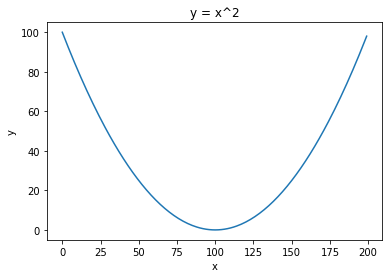

In [17]:
plt.plot(list(map(example.parabola, np.arange(-10,10,0.1) )))
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x^2");
